 **Salif Shafeeq Sofi
BU22CSEN0300372**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('/content/ML DataSet Country.csv')

In [ ]:
df.shape

(15409, 7)

In [ ]:
df.head()

,Country,ISO3,Year,Population,Population Growth,Growth Rate (%),Decade
0,Afghanistan,AFG,1960,8996973,NaN,NaN,1960s
1,Afghanistan,AFG,1961,9169410,172437.0,1.916611,1960s
2,Afghanistan,AFG,1962,9351441,182031.0,1.985199,1960s
3,Afghanistan,AFG,1963,9543205,191764.0,2.050636,1960s
4,Afghanistan,AFG,1964,9744781,201576.0,2.112246,1960s


In [ ]:
df.tail()

,Country,ISO3,Year,Population,Population Growth,Growth Rate (%),Decade
15404,Zimbabwe,ZWE,2014,13586681,236325.0,1.770178,2010s
15405,Zimbabwe,ZWE,2015,13814629,227948.0,1.677731,2010s
15406,Zimbabwe,ZWE,2016,14030390,215761.0,1.561830,2010s
15407,Zimbabwe,ZWE,2017,14236745,206355.0,1.470772,2010s
15408,Zimbabwe,ZWE,2018,14439018,202273.0,1.420781,2010s


In [ ]:
df.describe()

,Year,Population,Population Growth,Growth Rate (%)
count,15409.000000,1.540900e+04,1.514600e+04,15146.000000
mean,1989.069764,2.081236e+08,3.297912e+06,1.813048
std,17.031017,6.868312e+08,1.067664e+07,1.632461
min,1960.000000,3.893000e+03,-6.740000e+06,-20.942049
25%,1974.000000,9.268410e+05,6.240500e+03,0.788829
50%,1989.000000,6.418773e+06,8.683650e+04,1.773408
75%,2004.000000,4.244904e+07,6.088282e+05,2.660330
max,2018.000000,7.594270e+09,9.037486e+07,32.392335


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15409 entries, 0 to 15408
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            15409 non-null  object 
 1   ISO3               15409 non-null  object 
 2   Year               15409 non-null  int64  
 3   Population         15409 non-null  int64  
 4   Population Growth  15146 non-null  float64
 5   Growth Rate (%)    15146 non-null  float64
 6   Decade             15409 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 842.8+ KB


In [ ]:
df.isnull().sum()

,0
Country,0
ISO3,0
Year,0
Population,0
Population Growth,263
Growth Rate (%),263
Decade,0


In [ ]:
df[["Population", "Population Growth", "Growth Rate (%)"]] = df[["Population", "Population Growth", "Growth Rate (%)"]].replace(0, float('nan'))
df.fillna(df.median(numeric_only=True), inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ["Population", "Population Growth", "Growth Rate (%)"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
correlation = df.corr(numeric_only=True)
print(correlation)

                       Year  Population  Population Growth  Growth Rate (%)
Year               1.000000    0.082320           0.035564        -0.201340
Population         0.082320    1.000000           0.945440        -0.039034
Population Growth  0.035564    0.945440           1.000000         0.018299
Growth Rate (%)   -0.201340   -0.039034           0.018299         1.000000


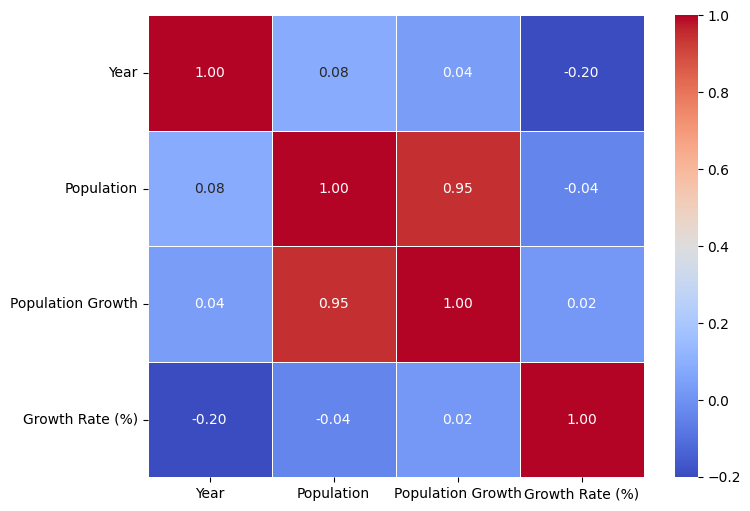

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In [ ]:
#splitting the data into features and target variables
from sklearn.model_selection import train_test_split


X = df.drop(columns=["Population Growth"])
y = df["Population Growth"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

colors = {
    "Logistic Regression": "blue",
    "KNN": "green",
    "SVM": "red",
    "Decision Tree": "purple",
    "Random Forest": "orange"
}

Logistic Regression ROC Curve: FPR vs TPR with AUC = 0.83
KNN ROC Curve: FPR vs TPR with AUC = 0.90
SVM ROC Curve: FPR vs TPR with AUC = 0.80
Decision Tree ROC Curve: FPR vs TPR with AUC = 0.98
Random Forest ROC Curve: FPR vs TPR with AUC = 1.00


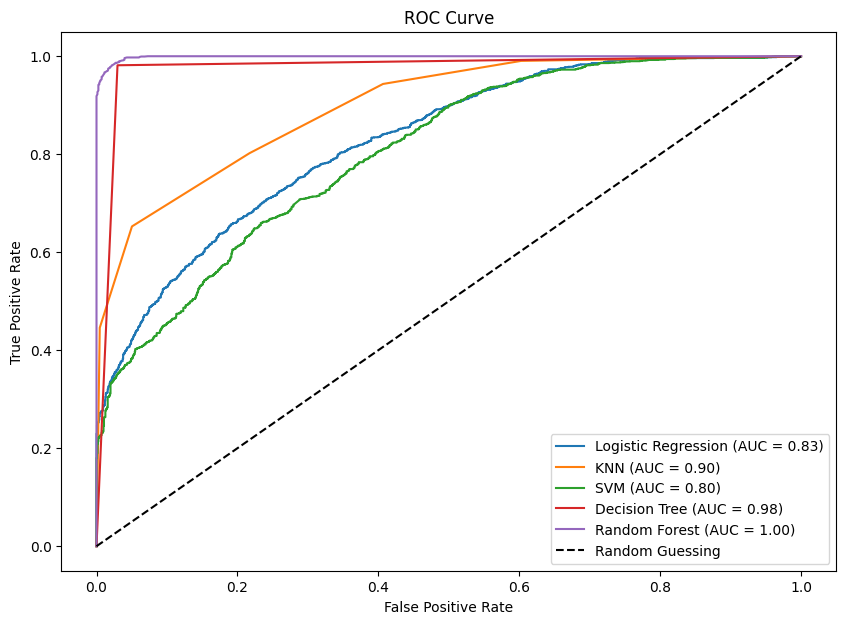

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


file_path = "/mnt/data/ML DataSet Country.csv"
df = pd.read_csv('/content/ML DataSet Country.csv')


df.fillna(df.mean(numeric_only=True), inplace=True)

#encoding categorical variables
categorical_cols = ["Country", "ISO3", "Decade"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#Binary Target Variable
df["Target"] = (df["Growth Rate (%)"] > df["Growth Rate (%)"].median()).astype(int)


X = df.drop(columns=["Target", "Growth Rate (%)"])
y = df["Target"]


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}


results = {}
plt.figure(figsize=(10, 7))
plt.title("ROC Curve for Different Models")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)


    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
        print(f"{name} ROC Curve: FPR vs TPR with AUC = {auc_score:.2f}")

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Confusion Matrix": conf_matrix
    }
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', linewidth=1.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
for name, metrics in results.items():
    print(f'\n{name} Results:')
    for metric, value in metrics.items():
        if metric == "Confusion Matrix":
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.4f}")


Logistic Regression Results:
Accuracy: 0.7317
Precision: 0.7417
Recall: 0.7271
F1-score: 0.7343
Confusion Matrix:
[[1112  398]
 [ 429 1143]]

KNN Results:
Accuracy: 0.7927
Precision: 0.7936
Recall: 0.8022
F1-score: 0.7978
Confusion Matrix:
[[1182  328]
 [ 311 1261]]

SVM Results:
Accuracy: 0.7064
Precision: 0.7219
Recall: 0.6902
F1-score: 0.7057
Confusion Matrix:
[[1092  418]
 [ 487 1085]]

Decision Tree Results:
Accuracy: 0.9760
Precision: 0.9717
Recall: 0.9816
F1-score: 0.9766
Confusion Matrix:
[[1465   45]
 [  29 1543]]

Random Forest Results:
Accuracy: 0.9796
Precision: 0.9766
Recall: 0.9835
F1-score: 0.9800
Confusion Matrix:
[[1473   37]
 [  26 1546]]


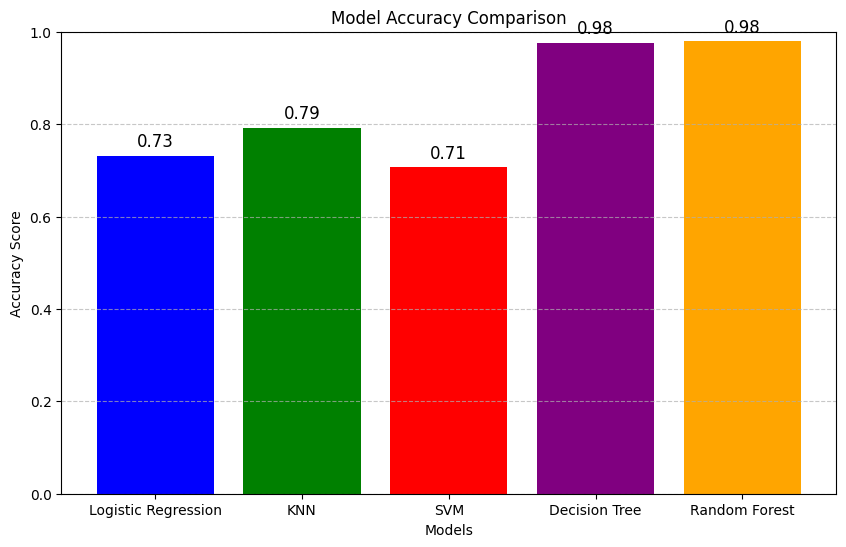

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy scores
model_names = list(results.keys())
accuracies = [results[name]["Accuracy"] for name in model_names]

# Plot Accuracy Comparison (Vertical Bar Chart)
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])

# Labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.title("Model Accuracy Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display accuracy values on top of the bars
for index, value in enumerate(accuracies):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center', fontsize=12)

plt.show()